<a href="https://colab.research.google.com/github/Mohamed-El10/Mohamed-El10/blob/main/AnalysWithKNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files


uploaded_train = files.upload()
uploaded_test = files.upload()

Saving Train1.xlsx to Train1.xlsx


Saving Test1.xlsx to Test1.xlsx


In [22]:
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt') # Used for sentence tokenizer
nltk.download('stopwords')
nltk.download('wordnet')
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib
import matplotlib.pyplot as plt

# Storing the training and test datasets into their respective dataframes
trained = pd.read_excel('Train1.xlsx')
test = pd.read_excel('Test1.xlsx')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [4]:
trained.head()

,Label,Content
0,pos,zero effect gets its title from the main chara...
1,pos,"you've seen this moment before , recently : a ..."
2,pos,you've probably heard the one about the priest...
3,pos,you've heard all the hype . \nyou've seen all ...
4,pos,you've got to love disney . \nno matter what t...


In [6]:
test.head()

,Label,Content
0,pos,you've got to think twice before you go see a ...
1,pos,Youssef has an amazing Hotel...we couldn't hav...
2,neg,"you know something , christmas is not about pr..."
3,neg,"yet another brainless teen flick , this one is..."
4,pos,wyatt earp has a lot to tell and little to say...


In [23]:
#pretraitement traindata
processed_lines = []
for line in trained['Content']:

    tokens = word_tokenize(line.lower())

    # remove punctuation from each word
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]

    # remove remaining tokens that are not alphabetic
    words = [word for word in stripped if word.isalpha()]

    # filter out stop words
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if not w in stop_words]

    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in words]

    cleaned_line = ' '.join(lemmatized_tokens)

    # Append the cleaned line to the list
    processed_lines.append(cleaned_line)

trained['Content'] =processed_lines

In [8]:
trained.head()

,Label,Content
0,pos,zero effect get it title from the main charact...
1,pos,you ve seen this moment before recently a part...
2,pos,you ve probably heard the one about the priest...
3,pos,you ve heard all the hype you ve seen all thei...
4,pos,you ve got to love disney no matter what they ...


In [24]:
#pretraitement testdata
processed_line = []
for line in test['Content']:

    tokens = word_tokenize(line.lower())

    # remove punctuation from each word
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]

    # remove remaining tokens that are not alphabetic
    words = [word for word in stripped if word.isalpha()]

    # filter out stop words
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if not w in stop_words]

    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in words]

    cleaned_line = ' '.join(lemmatized_tokens)

    # Append the cleaned line to the list
    processed_line.append(cleaned_line)

test['Content'] =processed_line

In [10]:
test.head()

,Label,Content
0,pos,you ve got to think twice before you go see a ...
1,pos,youssef ha an amazing hotel we could nt have a...
2,neg,you know something christmas is not about pres...
3,neg,yet another brainless teen flick this one is a...
4,pos,wyatt earp ha a lot to tell and little to say ...


In [25]:
#Training Data
train_unique = (list(set(trained['Content'].str.findall("\w+").sum()))) # Finding all the unique words in training data's Content column
train_unique_words = len(train_unique)

#Test Data
test_unique = (list(set(test['Content'].str.findall("\w+").sum()))) # Finding all the unique words in test data's Content column
test_unique_words = len(test_unique)

print("Unique words in Training Data: {}".format(train_unique_words))
print("Unique words in Test Data: {}".format(test_unique_words))

Unique words in Training Data: 39136
Unique words in Test Data: 14012


In [26]:
#Feature Extraction

#Training Data
train_matrix = [] # Forming a 2D matrix to store all training feature vectors

#Test Data
test_matrix = [] # Forming a 2D matrix to store all test feature vectors

In [27]:
#Training Data: Extracting features and storing them into the training feature matrix
for sentence in trained['Content']:
    train_featurevec = []
    word = sentence.split()
    for w in train_unique:
        train_featurevec.append(word.count(w))
    train_matrix.append(train_featurevec)

#Test Data: Extracting features and storing them into the test feature matrix
for sentence in test['Content']:
    test_featurevec = []
    word = sentence.split()
    for w in train_unique:
        test_featurevec.append(word.count(w))
    test_matrix.append(test_featurevec)

In [ ]:
print("Shape of Training Matrix: ({0} , {1})".format(len(train_matrix),len(train_matrix[0])))
print("Shape of Test Matrix: ({0} , {1})".format(len(test_matrix),len(test_matrix[0])))

Shape of Training Matrix: (2838 , 47043)
Shape of Test Matrix: (460 , 47043)


In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix


#Initializing lists to be used in plotting later.
acc_list = []
rec_list = []
prec_list = []
f1_list = []

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Create feature vectors
vectorizer = TfidfVectorizer(min_df = 5,
                             max_df = 0.8,
                             sublinear_tf = True,
                             use_idf = True)
traind_vectors = vectorizer.fit_transform(trained['Content'])
test_vectors = vectorizer.transform(test['Content'])

In [20]:
import time
def classifying(trainfeatures,testfeatures):

  X_train = trainfeatures #train_matrix - 2D feature vector
  X_test = testfeatures #test_matrix - 2D feature vector
  y_train = trained['Label'] #trained['Label]
  y_test = test['Label'] #test['Label]

  for k in [1,3,5,7,10]:

    classifier = KNeighborsClassifier(n_neighbors=k,algorithm='brute') #Using brute-force algorithm for quicker computation.
    t0 = time.time()
    classifier.fit(X_train, y_train) #Fitting the built-in sklearn classifier on our training data
    t1 = time.time()
    predicted_label = classifier.predict(X_test) #Making the classifier to predict on the previously unseen test data.
    t2 = time.time()
    accuracy_score = (metrics.accuracy_score(y_test,predicted_label))
    accuracy_score = (round(accuracy_score,2))*100
    acc_list.append(accuracy_score)

    confusion_mat = confusion_matrix(y_test, predicted_label)
    class_report = classification_report(y_test, predicted_label)

    macro_precision = (metrics.precision_score(y_test, predicted_label, average='macro'))
    macro_precision = (round(macro_precision,2))*100
    prec_list.append(macro_precision)

    macro_recall = (metrics.recall_score(y_test, predicted_label, average='macro'))
    macro_recall = (round(macro_recall,2))*100
    rec_list.append(macro_recall)

    macro_f1 = (metrics.f1_score(y_test, predicted_label, average='macro'))
    macro_f1 = (round(macro_f1,2))*100
    f1_list.append(macro_f1)

    time_train = t1-t0
    time_predict = t2-t1

    print("Training time: %fs; Prediction time: %fs" % (time_train, time_predict))
    print("\n\nConfusion Matrix for k = {} is:\n".format(k))
    print(confusion_mat)
    print("\nClassification Report for k = {} is:\n".format(k))
    print(class_report)
    print("Accuracy Score for k = {0} is: {1}%".format(k,accuracy_score))
    print("Macroaveraged Recall for k = {0} is: {1}%".format(k,macro_recall))
    print("Macroaveraged Precision for k = {0} is: {1}%".format(k,macro_precision))
    print("Macroaveraged F1-score for k = {0} is: {1}%".format(k,macro_f1))
    print("___________________________________________________________________ \n")


In [ ]:
classifying(train_matrix,test_matrix)

In [21]:
classifying(traind_vectors,test_vectors)

Training time: 0.050840s; Prediction time: 30.654209s


Confusion Matrix for k = 1 is:

[[123  63]
 [ 37 237]]

Classification Report for k = 1 is:

              precision    recall  f1-score   support

         neg       0.77      0.66      0.71       186
         pos       0.79      0.86      0.83       274

    accuracy                           0.78       460
   macro avg       0.78      0.76      0.77       460
weighted avg       0.78      0.78      0.78       460

Accuracy Score for k = 1 is: 78.0%
Macroaveraged Recall for k = 1 is: 76.0%
Macroaveraged Precision for k = 1 is: 78.0%
Macroaveraged F1-score for k = 1 is: 77.0%
___________________________________________________________________ 

Training time: 0.008473s; Prediction time: 26.923174s


Confusion Matrix for k = 3 is:

[[134  52]
 [ 29 245]]

Classification Report for k = 3 is:

              precision    recall  f1-score   support

         neg       0.82      0.72      0.77       186
         pos       0.82      0.89

In [ ]:

comment = """It's not even 5 days since i purchased this product.
I would say this a specially blended worst Phone in all formats.
ISSUE 1:
Have you ever heard of phone which gets drained even in standby mode during night?
Kindly please see the screenshot if you want to believe my statement.
My phone was in full charge at night 10:07 PM . I took this screenshot and went to sleep.
Then I woke up at morning and 6:35 AM and battery got drained by 56% in just standby condition.
If this is the case consider how many hours it will work, during day time.
It's not even 5 hours the battery is able to withstand.
ISSUE 2:
Apart from the battery, the next issue is the heating issue .I purchased a iron box recently from Bajaj in this sale.
But I realized this phone acts a very good Iron box than the Bajaj Iron box. I am using only my headphones to get connected in the call. I am not sure when this phone is will get busted due to this heating issue. It is definitely a challenge to hold this phone for even 1 minute. The heat that the phone is causing will definitely burn your hands and for man if you keep this phone in your pant pocket easily this will lead to infertility for you. Kindly please be aware about that.
Issue 3:
Even some unknown brands has a better touch sensitivity. The touch sensitivity is pathetic, if perform some operation it will easily take 1-2 minutes for the phone to response.
For your kind information my system has 73% of Memory free and the RAM is also 56% free.
Kindly please make this Review famous and lets make everyone aware of this issue with this phone.
Let's save people from buying this phone. There are people who don't even know what to do if this issue happens after 10 days from the date of purchase. So I feel at least this review will help people from purchasing this product in mere future."""

tab=[]

for k in [1,3,5,7,10]:
  classifier = KNeighborsClassifier(n_neighbors=k,algorithm='brute')
  # Create a feature vector for the new comment
  review_vect = vectorizer.transform([comment])

 # Predict the sentiment of the comment
  classifier.fit(traind_vectors, trained['Label'])
  predicted_label = classifier.predict(review_vect)
  # Print the predicted label

  tab.append(predicted_label)


pos = neg = 0
for label in tab :

  if(label == "pos") :
    pos+=1
  else :
    neg +=1

if(neg<pos): print("positive")
else : print("negative")


negative


<function matplotlib.pyplot.show(close=None, block=None)>

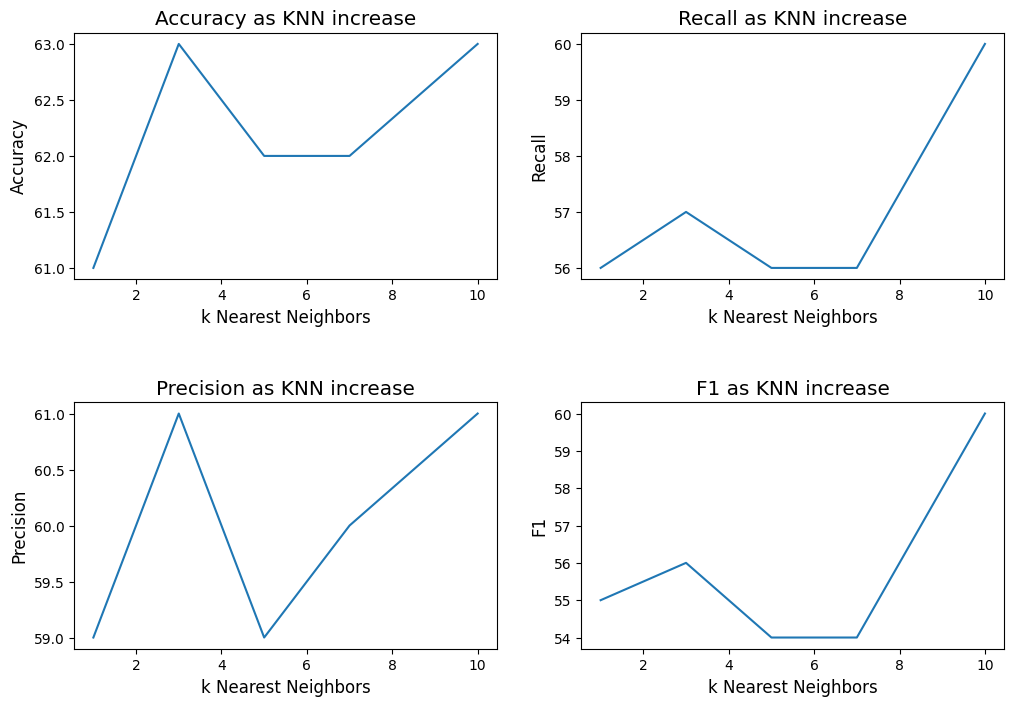

In [ ]:
k_ls = [1,3,5,7,10]

fig = plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.plot(k_ls,acc_list)
plt.title("Accuracy as KNN increase",fontsize='x-large')
plt.xlabel("k Nearest Neighbors",fontsize='large')
plt.ylabel("Accuracy",fontsize='large')

plt.subplot(2,2,2)
plt.plot(k_ls,rec_list)
plt.title("Recall as KNN increase",fontsize='x-large')
plt.xlabel("k Nearest Neighbors",fontsize='large')
plt.ylabel("Recall",fontsize='large')

plt.subplot(2,2,3)
plt.plot(k_ls,prec_list)
plt.title("Precision as KNN increase",fontsize='x-large')
plt.xlabel("k Nearest Neighbors",fontsize='large')
plt.ylabel("Precision",fontsize='large')

plt.subplot(2,2,4)
plt.plot(k_ls,f1_list)
plt.title("F1 as KNN increase",fontsize='x-large')
plt.xlabel("k Nearest Neighbors",fontsize='large')
plt.ylabel("F1",fontsize='large')

fig.subplots_adjust(hspace=.5)
plt.show